# Определение выгодного тарифа для телеком компании

<font size = 4> **Описание проекта**
        
Компания заказчика предоставляет услуги сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей компании: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. 
 
**Описание тарифов**
    
**Тариф «Смарт»**  
1. Ежемесячная плата: 550 рублей.  
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика.  
3. Стоимость услуг сверх тарифного пакета:  
    * Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.  
    * Сообщение — 3 рубля.  
    * 1 Гб интернет-трафика — 200 рублей.  
    
**Тариф «Ультра»**  
1. Ежемесячная плата: 1950 рублей.  
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика.  
3. Стоимость услуг сверх тарифного пакета:  
    * Минута разговора — 1 рубль. 
    * Сообщение — 1 рубль. 
    * 1 Гб интернет-трафика: 150 рублей.     
    

<font size = 4> **Цель проекта**
    
   На основе данных оператора сотовой связи проанализировать поведение клиентов и определить оптимальный тариф для заказчика.

<font size = 4> **План проекта**
    
**1.  Изучение данных**  
    
1.1  Импортируем библиотеки.  
1.2  Считываем данные из CSV-файлов в датафреймы и сохраняем в переменные.  
1.3  Выводим данные и основную информацию о датафреймах.   
    
**2.  Предобработка данных**  
    
2.1  Преобразуем типы данных.   
2.2  Удалим лишний столбец.   
2.3  Добавим новые столбцы в данные.   
2.4  Переименуем столбец.  
2.5  Выполним группировку данных.  
2.6  Объединим данные в одну таблицу.  
2.7  Обработаем пропуски.  
    
**3.  Рассчёт трат пользователей по месяцам**  
    
3.1  Рассчитаем объём услуг пользователей сверх тарифного пакета по месяцам.  
3.2  Переведём превышающий тарифный пакет интернет - трафик из мегабайтов в гигабайты.  
3.3  Рассчитаем затраты пользователей за услуги сверх тарифного пакета.  
3.4  Рассчитаем помесячную выручку компании с каждого пользователя.  
    
**4.  Исследовательский анализ данных**  
    
4.1  Выясним сколько клиентов расторгли контракт.  
4.2  Узнаем каким объёмом услуг пользуются клиенты с разными тарифами в месяц.  
4.3  Проверим гипотезy о различии средней выручки компании с абонентов разных тарифов.  
4.4  Проверим гипотезу о различии выручки компании с абонентов из Москвы и других регионов.  
    
**5.  Итоговый вывод**    

## Изучение данных 

### Импортируем библиотеки.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

### Считываем данные из CSV-файлов в датафреймы и сохраняем в переменные.

In [2]:
# Чтение файлов с данными и сохранение в переменные
try:
    calls = pd.read_csv('d:/Data_science/Projects_jupiter/data/calls.csv')
    internet = pd.read_csv('d:/Data_science/Projects_jupiter/data/internet.csv')
    messages = pd.read_csv('d:/Data_science/Projects_jupiter/data/messages.csv')
    tariffs = pd.read_csv('d:/Data_science/Projects_jupiter/data/tariffs.csv')
    users = pd.read_csv('d:/Data_science/Projects_jupiter/data/users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

### Выводим данные и  основную информацию о датафреймах. 

#### Изучаем таблицу `calls`.

In [3]:
# Вывод первых 5 строк таблицы "calls" (информация о звонках)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**Описание данных**
* `id` — уникальный номер звонка
* `call`_date — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [4]:
# Вывод основной информацию о данных таблицы "calls"
calls.info()
# Поиск дубликатов
print('Количество дубликатов:', calls.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Количество дубликатов: 0


**Замечание:** В данных нет пропусков. Дубликаты отсутствуют. Столбец даты имеет не верный формат. 

Рассмотрим столбец `duration` подробнее.

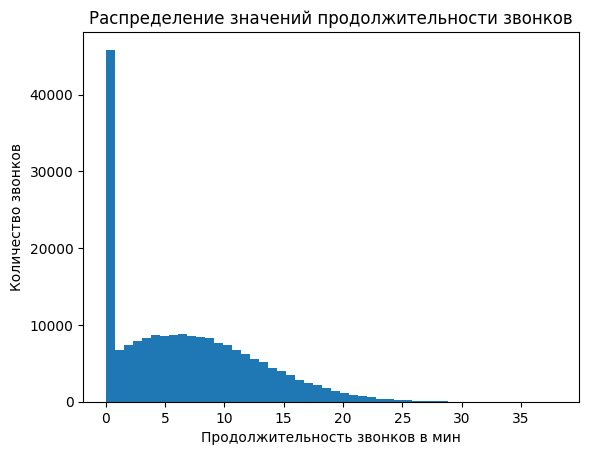

In [5]:
# Построение гистограммы для столбца "duration"
plt.hist(calls['duration'], density=False, bins=50)
plt.title('Распределение значений продолжительности звонков')
plt.xlabel('Продолжительность звонков в мин')
plt.ylabel('Количество звонков')
plt.show();

**Замечание:** Мы видим очень много звонков с длительностью 0 минут. Скорее всего это пропущенные звонки. На исследование они никак не повлияют.  
В основном звонки не длятся более 20 минут. Чаще всего они короче 10 минут.

#### Изучаем таблицу `internet`.

In [6]:
# Вывод первых 5 строк таблицы "internet" (информация об интернет - сессиях)
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**Описание данных**
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [7]:
# Вывод основной информацию о данных таблицы "internet"
internet.info()
# Поиск дубликатов
print('Количество дубликатов:', internet.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Количество дубликатов: 0


**Замечание:** В данных нет пропусков. Дубликаты отсутствуют. Столбец даты имеет не верный формат. Появился столбец `Unnamed: 0`, который дублирует значения индексов. В дальнейшем мы его удалим.

Рассмотрим столбец `mb_used` подробнее.

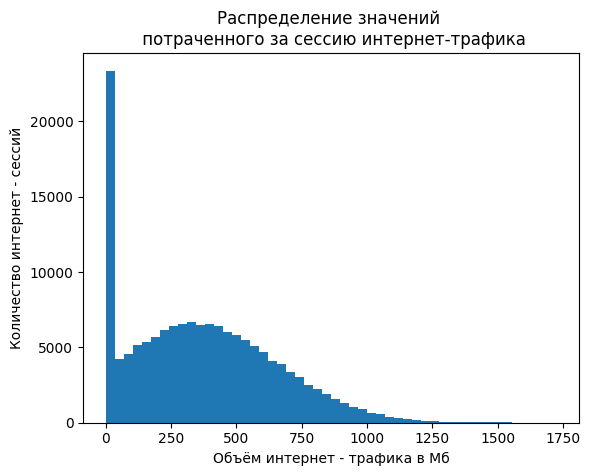

In [8]:
# Построение гистограммы для столбца "mb_used"
plt.hist(internet['mb_used'], density=False, bins=50)
plt.title('Распределение значений \n потраченного за сессию интернет-трафика')
plt.xlabel('Объём интернет - трафика в Мб')
plt.ylabel('Количество интернет - сессий')
plt.show();

**Замечание:** Мы видим большое количество данных с 0 Мб. Скорее всего это пустые сессии, которые создаются автоматически. На исследование они никак не повлияют.  
В основном пользовательские сессии не превышают объём в 1000 Мб. В основном за сессию тратится от 250 до 500 Мб трафика.

#### Изучаем таблицу `messages`.

In [9]:
# Вывод первых 5 строк таблицы "messages" (информация о сообщениях)
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**Описание данных**
* `id` — уникальный номер звонка
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя 

In [10]:
# Вывод основной информацию о данных таблицы "internet"
messages.info()
# Поиск дубликатов
print('Количество дубликатов:', messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Количество дубликатов: 0


**Замечание:** В данных нет пропусков. Дубликаты отсутствуют. Столбец даты имеет не верный формат. 

#### Изучаем таблицу `tariffs`.

In [11]:
# Вывод всего датафрейма "tariffs" (информация о тарифах)
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Описание данных**
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц (включённых в абонентскую плату)
* `messages_included` — количество сообщений в месяц (включённых в абонентскую плату)
* `mb_per_month_included` — объём интернет-трафика (включённого в абонентскую плату в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [12]:
# Вывод основной информацию о данных таблицы "tariffs"
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Замечание:** В данных нет пропусков.

#### Изучаем таблицу `users`.

In [13]:
# Вывод первых 5 строк таблицы "users" (информация о пользователях)
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**Описание данных**
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

In [14]:
# Вывод основной информацию о данных таблицы "users"
users.info()
# Поиск дубликатов
print('Количество дубликатов:', users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Количество дубликатов: 0


**Замечание:** В данных есть пропуски в столбце `churn_date`. Там где значение пропущено, тариф ещё действовал на момент выгрузки данных. Дубликаты отсутствуют. Столбец даты имеет не верный формат.

**Вывод:**  

Итак, в нашем распоряжении пять таблиц, практически все без пропущенных значений. В дальнейшем нам будет нужно преобразовать форматы столбцов с датами, некоторые данные удалить и обработать пропуски.

Название столбцов о тарифах отличается в таблицах `tariffs` и `users`. Нужно будет их привести к одному виду для дальнейшего объединения таблиц.

## Предобработка данных

### Преобразуем типы данных.
Некоторые типы данных нужнно изменить для удобства работы с ними.  
Кроме того, количество использованных минут компания заказчика всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому округлим эти значения в большую сторону.

In [15]:
# Перевод данных в формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format ='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format ='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format ='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format ='%Y-%m-%d')
# Округление значений столбца "duration" с помощью np.ceil() в большую сторону и приведение к типу "int"
calls['duration'] = np.ceil(calls['duration']).astype('int')

### Удалим лишний столбец `Unnamed: 0` из датафрейма `sessions`.

Скорее всего столбец с таким названием возник, при сохранении данных с указанием индекса (`df.to_csv(..., index=column)`). Нам он не понадобится.

In [16]:
# Удаление столбца с данными
internet = internet.drop('Unnamed: 0', axis = 1, errors = 'ignore')

### Добавим новые столбцы в данные.
Так как исходные тарифы пользования услугами расчитаны на месяц, то далее нам нужно будет анализировать данные по месяцам.

Для этого из столбцов с датами выделим информацию о месяцах пользования услугами в отдельные столбцы.

In [17]:
# Создание столбцов с информацией по месяцам
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'] .dt.month
internet['month'] = internet['session_date'].dt.month

### Переименуем столбец.
Поменяем имя столбца `tariff_name` из таблицы `tariffs` на имя `tariff` из таблицы `users`.

In [18]:
# Переименование столбца tariff_name на более простое tariff
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

### Выполним группировку данных.
Сгруппируем данные о звонках, сообщениях и интернет-сессиях по месяцам для каждого пользователя.

#### Подсчитаем количество сделанных звонков для каждого пользователя по месяцам.

In [19]:
# Подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = calls.groupby(['user_id','month']).agg(calls=('duration','count'))
# Вывод таблицы на экран
calls_per_month

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
...              ...
1498    10        41
1499    9          9
        10        68
        11        74
        12        69

[3174 rows x 1 columns]

#### Подсчитаем количество израсходованных минут для каждого пользователя по месяцам.

In [20]:
# Подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = calls.groupby(['user_id','month']).agg(minutes=('duration','sum'))
# Вывод таблицы на экран
minutes_per_month

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
...                ...
1498    10         247
1499    9           70
        10         449
        11         612
        12         492

[3174 rows x 1 columns]

#### Подсчитаем количество отправленных сообщений для каждого пользователя по месяцам.

In [21]:
# Подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = messages.groupby(['user_id','month']).agg(messages=('message_date','count'))
# Вывод таблицы на экран
messages_per_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

#### Подсчитаем количество потраченных мегабайт для каждого пользователя по месяцам.

In [22]:
# Подсчёт потраченных мегабайт для каждого пользователя по месяцам
internet_per_month = internet.groupby(['user_id','month']).agg({'mb_used':'sum'})
# Вывод таблицы на экран
internet_per_month

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

### Объединим данные в одну таблицу.
Объединим все посчитанные выше значения в один датафрейм `user_behavior`. Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [23]:
# Объединение таблиц в одну
user_behavior = (calls_per_month.merge(messages_per_month, left_index=True, right_index=True, how='outer')
                                .merge(internet_per_month, left_index=True, right_index=True, how='outer')
                                .merge(minutes_per_month, left_index=True, right_index=True, how='outer')
                                .reset_index()
                                .merge(users, how='left', left_on='user_id', right_on='user_id')
                                .merge(tariffs, on='tariff'))
# Вывод таблицы на экран
user_behavior

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,42.0,20579.36,247.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,9,9.0,11.0,1845.75,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,10,68.0,48.0,17788.51,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,11,74.0,59.0,17963.31,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


### Обработаем пропуски.

In [24]:
# Вывод количества пропущенных значений
user_behavior.isna().sum()

user_id                     0
month                       0
calls                      40
messages                  497
mb_used                    11
minutes                    40
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

**Замечание:** После объединения таблиц образовались пропуски. Заполним пропущенную информацию по звонкам, сообщениям и интернет - трафику нулями. Видимо пользователи не пользовались услугами в эти месяцы. 

Столбец `churn_date` оставим "как есть". Он нам не пригодится.

In [25]:
# Заполнение пропусков
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

**Вывод:**  

На данном этапе мы предобработали данные и создали общую таблицу (на основе сгруппированных данных).

## Рассчёт трат пользователей по месяцам
Для этого предварительно нам потребуется рассчитать дополнительные значения.

### Рассчитаем количество минут разговоров, сообщений и мегабайт интернета пользователей по месяцам сверх тарифного пакета.

In [26]:
# Рассчёт значений сверх тарифного пакета 
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']
# Замена отрицательных значений на 0 для случая, 
# когда потраченные объёмы услуг не превышают объёмов услуг включенных в тарифный пакет
for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

### Переведём превышающий тарифный пакет интернет-трафик из мегабайтов в гигабайты.
Количество интернет - трафика компания заказчика всегда округляет вверх (как и минуты разговоров). Поэтому округлим эти значения в большую сторону.

In [27]:
# Перевод данных в гигабайты с округлением вверх и приведение к типу "int"
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

### Рассчитаем затраты пользователей за минуты разговоров, сообщения и интернет сверх тарифного пакета.

In [28]:
# Рассчёт помесячых затрат пользователей на услуги сверх тарифного пакета
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

### Рассчитаем затраты пользователей по месяцам (помесячную выручку компании с каждого пользователя).

In [29]:
# Рассчёт общих трат пользователей по месяцам
user_behavior['total_cost'] = user_behavior['rub_monthly_fee']\
                            + user_behavior['cost_minutes']\
                            + user_behavior['cost_messages']\
                            + user_behavior['cost_gb']
# Увеличение лимита отображаемых столбцов для того, чтобы было видно всю таблицу
pd.set_option('display.max_columns', None)
# Вывод таблицы на экран
user_behavior

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,42.0,20579.36,247.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3,0.0,0.0,5219.36,6,0.0,0.0,1200,1750.0
3210,1499,9,9.0,11.0,1845.75,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,0.0,0.0,0.00,0,0.0,0.0,0,550.0
3211,1499,10,68.0,48.0,17788.51,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,0.0,0.0,2428.51,3,0.0,0.0,600,1150.0
3212,1499,11,74.0,59.0,17963.31,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3,112.0,9.0,2603.31,3,336.0,27.0,600,1513.0


**Вывод:**  

В итоге в общую таблицу мы добавили информацию об объёме услуг, которыми пользуются клиенты сверх тарифного пакета, по месяцам. Так же добавили информацию о затратах пользователей на эти услуги и общие затраты клиентов по месяцам.

## Исследовательский анализ данных

### Выясним сколько клиентов расторгли контракт.

In [30]:
# Группировка данных по тарифам и рассчёт процента ушедших клиентов
churn_users = users.groupby('tariff')[['user_id', 'churn_date']].count()
churn_users['churn_%'] = round(churn_users['churn_date'] / churn_users['user_id'] * 100, 2)
# Переименование столбцов для удобства 
churn_users.columns = ['all_clients', 'churn_clients', 'churn_%']
# Вывод таблицы на экран
churn_users

,all_clients,churn_clients,churn_%
tariff,,,
smart,351,23,6.55
ultra,149,15,10.07


**Замечание:** 10 % клиентов компании с тарифом `Ultra` расторгают контракты (15 человек из 149).   
Клиенты с тарифом `Smart` расторгают контракты в 6,5 % случаев (23 человека из 351). Они более лояльны.

### Узнаем сколько звонков, сколько минут разговора, сколько сообщений и какой объём интернет-трафика тратится пользователями каждого тарифа в месяц.

Для этого сначала сгруппируем необходимые данные по месяцам и тарифам. Также напишем функции для удобства вывода графиков.

In [31]:
# Сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение)
stats_df = (user_behavior.pivot_table(index=['month', 'tariff'],
                                      values=['calls', 'minutes', 'messages', 'mb_used'],
                                      aggfunc=['mean', 'count'])
                         .round(2)
                         .reset_index())
# Переименование столбцов для удобства (замена мультииндекса)
stats_df.columns = ['month', 'tariff', 'calls_mean', 'mb_used_mean', 'messages_mean', 'minutes_mean',
                                       'calls_count', 'mb_used_count', 'messages_count', 'minutes_count']
# Рассчёт доли (в %) пользователей тарифа по месяцам от общего числа пользователей внутри тарифа
stats_df.loc[stats_df['tariff'] == 'smart', '%_users'] =  stats_df.loc[stats_df['tariff'] == 'smart', 'calls_count'] / 351                                                   
stats_df.loc[stats_df['tariff'] == 'ultra', '%_users'] = stats_df.loc[stats_df['tariff'] == 'ultra', 'calls_count'] / 149
# Вывод таблицы на экран
stats_df.head()

,month,tariff,calls_mean,mb_used_mean,messages_mean,minutes_mean,calls_count,mb_used_count,messages_count,minutes_count,%_users
0,1,smart,27.68,8513.72,18.24,203.85,34,34,34,34,0.096866
1,1,ultra,59.44,13140.68,33.78,428.11,9,9,9,9,0.060403
2,2,smart,40.19,11597.05,24.09,298.69,58,58,58,58,0.165242
3,2,ultra,41.54,11775.94,21.96,297.12,24,24,24,24,0.161074
4,3,smart,54.32,15104.16,31.86,390.05,77,77,77,77,0.219373


In [32]:
# Функция вывода столбчатого графика для таблицы "stats_df"
def graph_bar(column, title, ylabel):
    '''
    column - столбец таблицы "stats_df" для которого строится график
    title - название таблицы
    ylabel - подпись оси y для таблицы
    '''
    # Определение размера графика
    plt.figure(figsize=(8, 5));
    # Построение столбчатого графика для таблицы "stats_df"
    ax = sns.barplot(x='month',
                     y=column,
                     hue="tariff",
                     data=stats_df,
                     palette=['lightblue', 'blue'])
    ax.set_title(title)
    ax.set(xlabel='Номер месяца', 
           ylabel=ylabel);

In [33]:
# Функция вывода гистограмм и графика "ящик с усами" для таблицы "user_behavior" 
def graph_dist_box(column, title, xlabel, ylabel):
    '''
    column - столбец таблицы "user_behavior" для которого строятся графики
    title - название таблицы
    xlabel - подпись оси x для таблицы
    ylabel - подпись оси y для таблицы
    '''
    # Определение размера графика
    plt.figure(figsize=(8, 5));
    # Построение гистограммы для тарифа "smart"
    sns.distplot(user_behavior[user_behavior['tariff'] == 'smart'][column].round(),
                 label='Smart',
                 bins=30,
                 kde=False,
                 norm_hist = False)
    # Построение гистограммы для тарифа "ultra"
    sns.distplot(user_behavior[user_behavior['tariff'] == 'ultra'][column].round(),
                 label='Ultra',
                 bins=30,
                 kde=False,
                 norm_hist = False)
    # Построение линии среднего значения для тарифа "smart"
    plt.axvline(user_behavior[user_behavior['tariff'] == 'smart'][column].mean(),
                color='blue',
                linestyle='--',
                label='Smart среднее');
    # Построение линии среднего значения для тарифа "ultra"
    plt.axvline(user_behavior[user_behavior['tariff'] == 'ultra'][column].mean(),
                color='orange',
                linestyle='--',
                label='Ultra среднее');
    plt.legend(['Smart среднее',
                'Ultra среднее',
                'Smart',
                'Ultra']);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.show();
    # Определение размера графика
    plt.figure(figsize=(8, 2));
    # Построение графика "ящик с усами" для таблицы "user_behavior" вместе со средними значениями
    sns.boxplot(data=user_behavior,
                x=column,
                y='tariff',
                order=['smart', 'ultra'],
                showmeans=True,
                meanprops={'marker': '|', 
                           'markeredgecolor': 'white', 
                           'markersize': '20'});
    plt.xlabel(xlabel);
    plt.ylabel('Тарифы');

#### Выясним какое количество пользователей было у компании в каждом месяце.

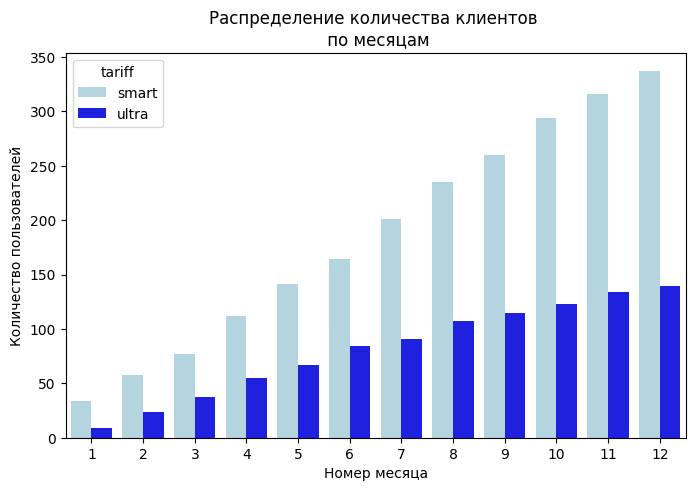

In [34]:
graph_bar('calls_count',
          'Распределение количества клиентов \n по месяцам',
          'Количество пользователей')

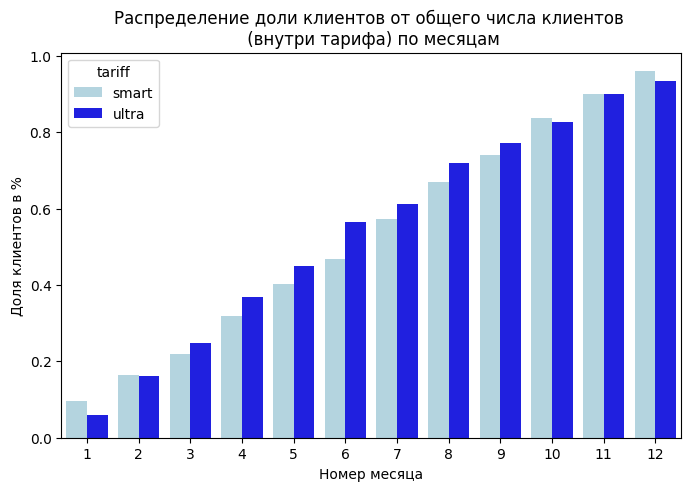

In [35]:
graph_bar('%_users',
          'Распределение доли клиентов от общего числа клиентов \n (внутри тарифа) по месяцам',
          'Доля клиентов в %')

**Замечание:** Мы располагаем данными за 2018 год. На графиках видно, что количество клиентов компании росло в течение года (судя по данным которыми мы располагаем). Количество пользователей тарифом `Smart` росло заметно быстрее. Однако в процентном отношении от общего числа клиентов (внутри тарифа) рост равномерный. 

#### Выясним сколько звонков в среднем совершали клиенты в месяц. 

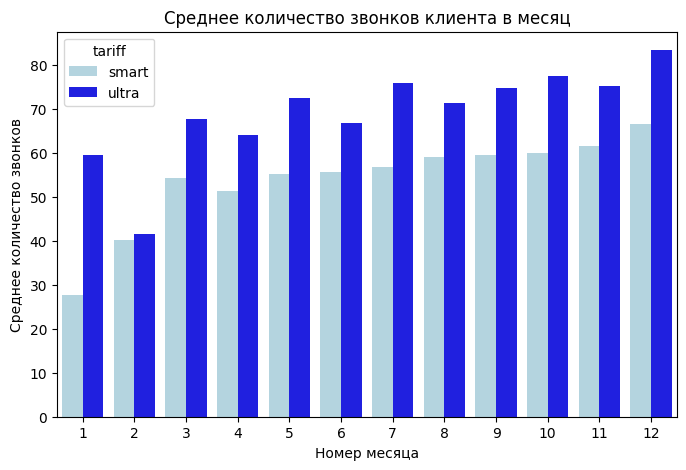

In [36]:
graph_bar('calls_mean',
          'Среднее количество звонков клиента в месяц',
          'Среднее количество звонков')

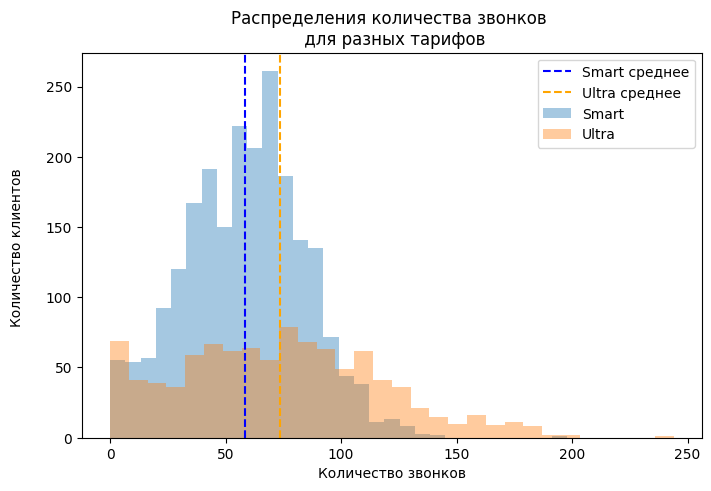

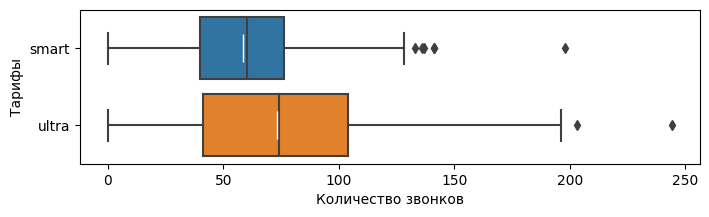

In [37]:
graph_dist_box('calls',
               'Распределения количества звонков \n для разных тарифов',
               'Количество звонков',
               'Количество клиентов \n')

**Замечание:** Среднее количество звонков пользователей растёт в течение года для обоих тарифов.
Среднее количество звонков у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. Интересно, что медиана практически равна среднему в обоих случаях.

#### Выясним среднюю продолжительность звонка клиента.

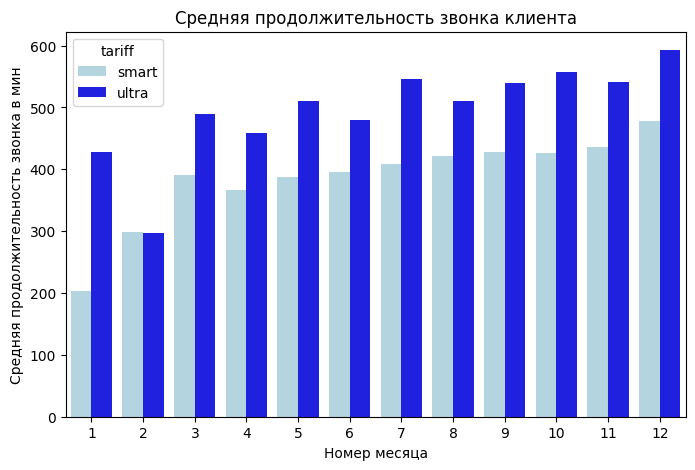

In [38]:
graph_bar('minutes_mean',
          'Средняя продолжительность звонка клиента',
          'Средняя продолжительность звонка в мин')

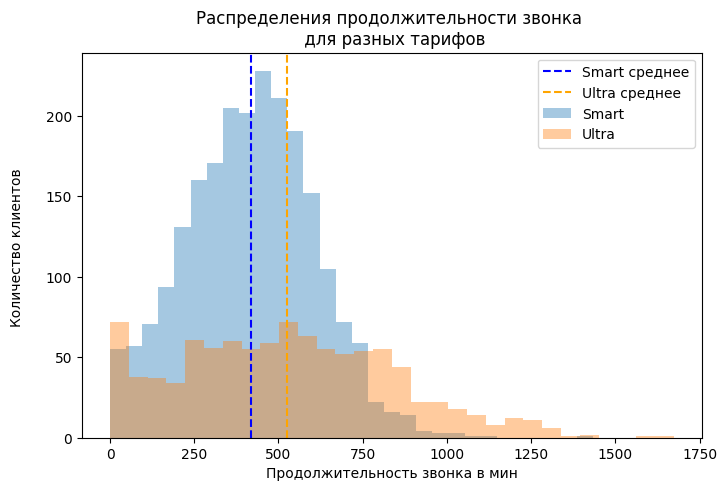

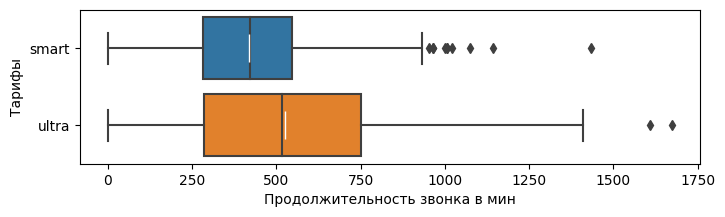

In [39]:
graph_dist_box('minutes',
               'Распределения продолжительности звонка \n для разных тарифов',
               'Продолжительность звонка в мин',
               'Количество клиентов \n')

**Замечание:** В течение года у пользователей обоих тарифов увеличивается средняя продолжительность разговоров.  
Средняя длительность разговоров у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. Интересно, что медиана практически равна среднему в обоих случаях.

#### Выясним сколько сообщений (в среднем) в месяц отправляли клиенты.

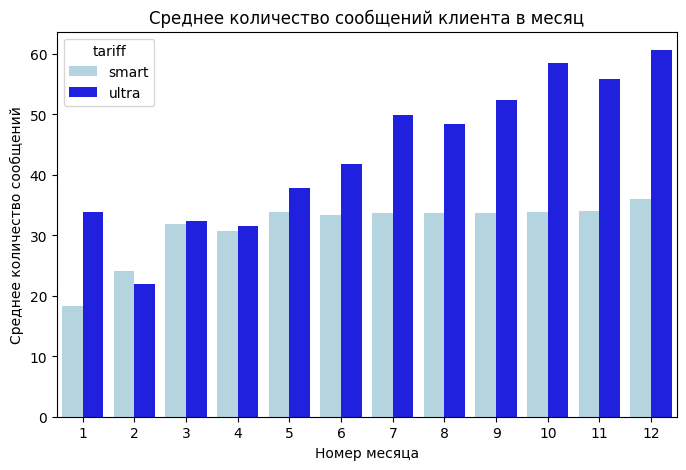

In [40]:
graph_bar('messages_mean',
          'Среднее количество сообщений клиента в месяц',
          'Среднее количество сообщений')

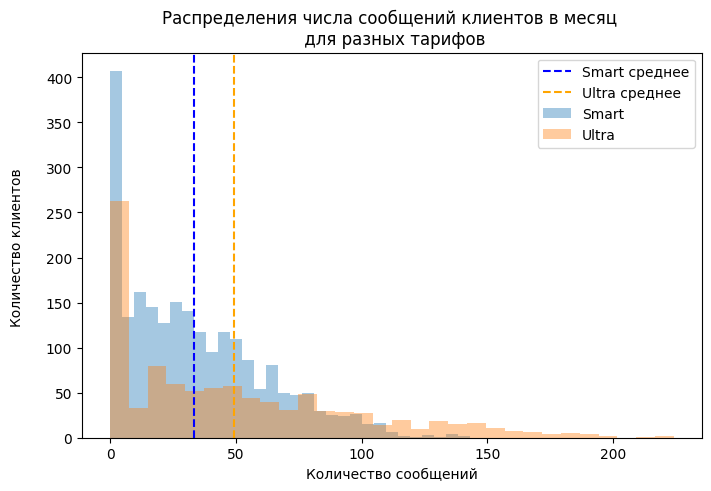

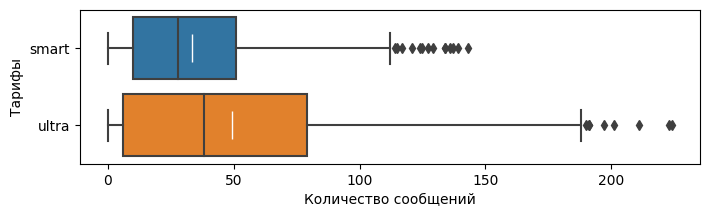

In [41]:
graph_dist_box('messages',
               'Распределения числа сообщений клиентов в месяц \n для разных тарифов',
               'Количество сообщений',
               'Количество клиентов \n')

**Замечание:** Среднее количество сообщений в течение года растет для абонентов тарифа `Ultra`. Клиенты с тарифом `Smart` в среднем отправляют одинаковое число сообщений в течение года.
В среднем пользователи тарифа `Ultra` отправляют больше, почти на 20, сообщений. 
В январе и феврале отмечено наименьшее количество сообщений в среднем за год (также как и для других услуг). 

#### Выясним сколько Мб трафика в среднем тратили клиенты в месяц.

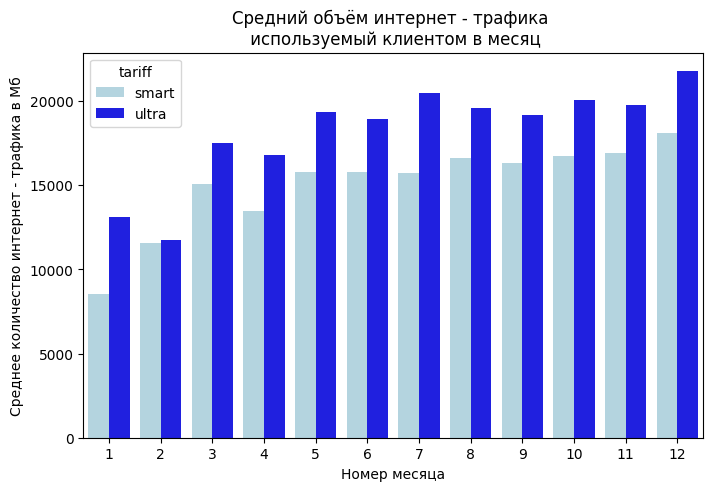

In [42]:
graph_bar('mb_used_mean',
          'Средний объём интернет - трафика \n используемый клиентом в месяц',
          'Среднее количество интернет - трафика в Мб')

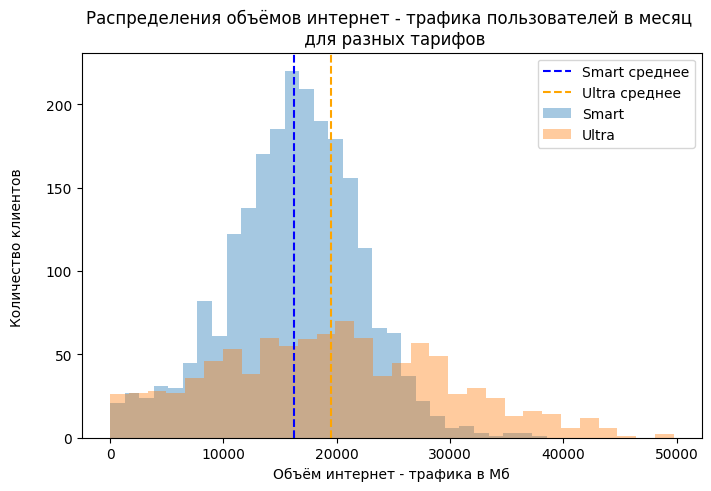

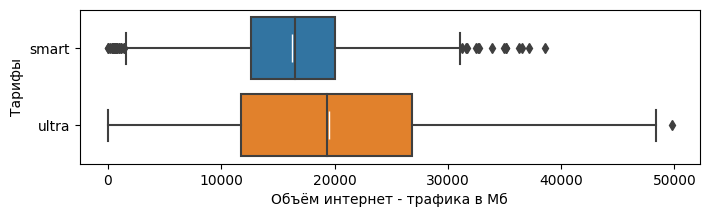

In [43]:
graph_dist_box('mb_used',
               'Распределения объёмов интернет - трафика пользователей в месяц \n для разных тарифов',
               'Объём интернет - трафика в Мб',
               'Количество клиентов \n')

**Замечание:** До мая месяца количество используемого трафика растёт в обоих случаях. Начиная с мая месяца этот показатель остаётся на уровне. 
В среднем пользователи тарифа `Ultra` пользуются интернетом больше других. 

**Вывод:**

Исходя из полученных графиков видно, что пользователи тарифа `Ultra` в среднем говорят чаще, тратят больше минут, отправляют больше сообщений и используют больше интернет - трафика. Это вполне логично.

### Проверим гипотезy о различии средней выручки компании с абонентов разных тарифов. 

#### Узнаем сколько денег в месяц тратили клиенты с разными тарифами.

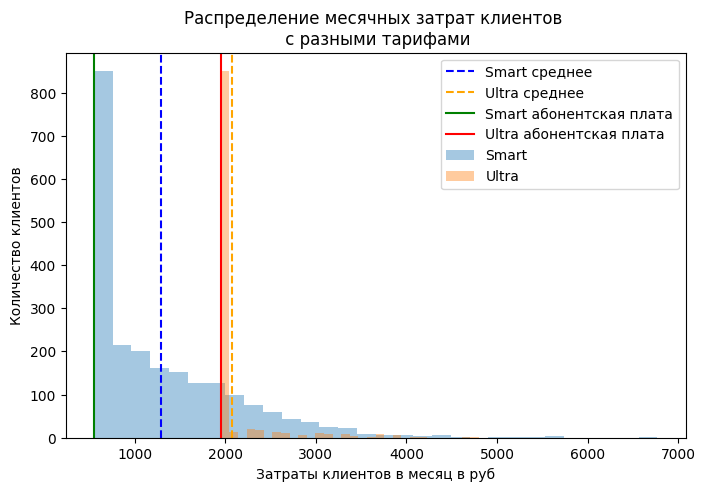

In [44]:
# Определение размера графика
plt.figure(figsize=(8, 5))
# Построение гистограммы для тарифа "smart"
sns.distplot(user_behavior[user_behavior['tariff'] == 'smart']['total_cost'],
             label='Smart',
             bins=30,
             kde=False)
# Построение гистограммы для тарифа "ultra"
sns.distplot(user_behavior[user_behavior['tariff'] == 'ultra']['total_cost'],
             label='Ultra',
             bins=30,
             kde=False)
# Построение линии среднего значения для тарифа "smart"
plt.axvline(user_behavior[user_behavior['tariff'] == 'smart']['total_cost'].mean(),
            color='blue',
            linestyle='--',
            label='Smart среднее');
# Построение линии среднего значения для тарифа "ultra"
plt.axvline(user_behavior[user_behavior['tariff'] == 'ultra']['total_cost'].mean(),
            color='orange',
            linestyle='--',
            label='Ultra среднее');
# Построение линии значения абонентской платы для тарифа "smart"
plt.axvline(550,
            color='green',
            label='Smart абонентская плата');
# Построение линии значения абонентской платы для тарифа "ultra"
plt.axvline(1950,
            color='red',
            label='Ultra абонентская плата');
plt.legend(['Smart среднее',
            'Ultra среднее',
            'Smart абонентская плата',
            'Ultra абонентская плата',
            'Smart',
            'Ultra']);
plt.title('Распределение месячных затрат клиентов \n с разными тарифами');
plt.xlabel('Затраты клиентов в месяц в руб');
plt.ylabel('Количество клиентов');
plt.show();

**Замечание:** 
Большинство клиентов тарифа `Ultra` обходятся услугами входящими в абоненсткую плату за тариф (средние траты и абонентская плата практически совпадают). Услугами сверх включённого пакета пользуются в основном клиенты с тарифом `Smart`.

In [45]:
# Вывод на экран значений средних трат пользователей в месяц
print('В среднем один пользователь тарифа Смарт приносит: {:.0f} рублей в месяц (абон. плата - 550 рублей)'
      .format(user_behavior[user_behavior['tariff'] == 'smart']['total_cost'].mean()))
print('В среднем один пользователь тарифа Ультра приносит: {:.0f} рублей в месяц (абон. плата - 1950 рублей) \n'
      .format(user_behavior[user_behavior['tariff'] == 'ultra']['total_cost'].mean()))

В среднем один пользователь тарифа Смарт приносит: 1290 рублей в месяц (абон. плата - 550 рублей)
В среднем один пользователь тарифа Ультра приносит: 2070 рублей в месяц (абон. плата - 1950 рублей) 



#### Проверим гипотезу статистическим методом.

Итак, мы видим, что средняя выручка с пользователей тарифа `Ultra` заметно превышает выручку с пользователей тарифом `Smart` (2070 против 1290). Однако мы располагаем данными лишь выборкой о 500 пользователях компании. Для того, чтобы предположить различие в выручках с пользователей разных тарифов для всех клиентов компании (генеральная совокупность) проверим нашу гипотезу статистическим методом.  

Далее будем применять t-тест для проверки гипотезы о равенстве средних двух генеральных совокупностей.

**Проверка гипотезы: средние выручки с пользователей тарифов `Ultra` и `Smart` различаются.**

Для проведения теста сформулируем 2 гипотезы (нулевую и альтернативную):  

* H_0: Выручка (`total_cost`) с пользователей `Ultra` = выручка (`total_cost`) с пользователей `Smart`.  
* H_a: Выручка (`total_cost`) с пользователей `Ultra` ≠ выручка (`total_cost`) с пользователей `Smart`.  

Примем уровень значимости `alpha = 0.05` и, что дисперсии выборок не равны `equal_var = False`.


In [46]:
# Выполнение t - теста с гипотезой о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(user_behavior.loc[user_behavior['tariff'] =='ultra', 'total_cost'],
                       user_behavior.loc[user_behavior['tariff'] =='smart', 'total_cost'],
                       equal_var = False)
# Выбор уровня значимости
alpha = 0.05
# Вывод значения p-value на экран 
print('p-value = ', results.pvalue)
# Вывод строки с ответом на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value =  4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Замечание:** У нас получилось очень маленькое значение `p-value` ( а также `p-value` < `alpha`). Это означает, что вероятность получить такие средние значения при условии, что нулевая гипотеза верна (средние двух выборок равны), крайне мала. Поэтому мы отвергаем нулевую гипотезу и принимаем альтернативную. 

Мы предполагаем, что **средние выручки с пользователей тарифов Ultra и Smart различаются (для всей генеральной совокупности).**

#### Выясним сколько всего денег потратили клиенты с разными тарифами.

In [47]:
# Вывод на экран общей выручки с пользователей разных тарифов
print('Годовая прибыль по тарифу Смарт: {:.0f} рублей'
      .format(user_behavior[user_behavior['tariff'] == 'smart']['total_cost'].sum()))
print('Годовая прибыль по тарифу Ультра: {:.0f} рублей\n'
      .format(user_behavior[user_behavior['tariff'] == 'ultra']['total_cost'].sum()))

Годовая прибыль по тарифу Смарт: 2875351 рублей
Годовая прибыль по тарифу Ультра: 2039100 рублей



**Вывод:**

Если смотреть по средней выручке c каждого пользователя, то мы можем видеть, что каждый пользователь тарифа `Ultra` приносит компании в среднем 2070 рублей в месяц. Когда пользователь тарифа `Smart` приносит лишь 1290 рублей в месяц.

Но если посчитать годовую выручку компании, то мы видим, что выручка по тарифу `Smart` приносит компании 2 875 351 рубль в год, когда выручка по тарифу `Ultra` приносит 2 039 100 рублей в год. Это объясняется тем, что количество пользователей тарифа `Smart` намного больше (351 против 149). И при этом приток клиентов происходит равномерно для обоих тарифов. 


### Проверим гипотезу о различии выручки компании с абонентов из Москвы и других регионов.

#### Узнаем сколько денег в месяц тратили клиенты из Москвы и остальных городов.

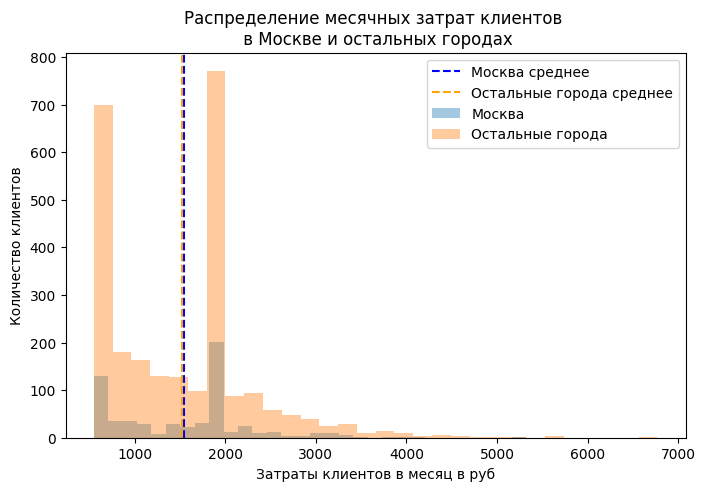

In [48]:
# Определение размера графика
plt.figure(figsize=(8, 5))
# Построение гистограммы для тарифа "smart"
sns.distplot(user_behavior[user_behavior['city'] == 'Москва']['total_cost'],
             label='Москва',
             bins=30,
             kde=False)
# Построение гистограммы для тарифа "ultra"
sns.distplot(user_behavior[user_behavior['city'] != 'Москва']['total_cost'],
             label='Остальные города',
             bins=30,
             kde=False)
# Построение линии среднего значения для тарифа "smart"
plt.axvline(user_behavior[user_behavior['city'] == 'Москва']['total_cost'].mean(),
            color='blue',
            linestyle='--',
            label='Москва среднее');
# Построение линии среднего значения для тарифа "ultra"
plt.axvline(user_behavior[user_behavior['city'] != 'Москва']['total_cost'].mean(),
            color='orange',
            linestyle='--',
            label='Остальные города среднее');
plt.legend(['Москва среднее', 'Остальные города среднее','Москва', 'Остальные города']);
plt.title('Распределение месячных затрат клиентов \n в Москве и остальных городах');
plt.xlabel('Затраты клиентов в месяц в руб');
plt.ylabel('Количество клиентов');
plt.show();

In [49]:
print('В среднем один пользователь из Москвы приносит: {:.0f} рублей в месяц.'
      .format(user_behavior[user_behavior['city'] == 'Москва']['total_cost'].mean()))
print('В среднем один пользователь из другого города приносит: {:.0f} рублей в месяц.'
      .format(user_behavior[user_behavior['city'] != 'Москва']['total_cost'].mean()))

В среднем один пользователь из Москвы приносит: 1547 рублей в месяц.
В среднем один пользователь из другого города приносит: 1525 рублей в месяц.


#### Проверим гипотезу статистическим методом.
Итак, мы видим, что средняя выручка с пользователей из Москвы немного превышает выручку с пользователей из других городов (1547 против 1525). Однако мы располагаем данными лишь выборкой о 500 пользователях компании. Для того, чтобы предположить различие в выручках с пользователей Москвы и других городов для всех клиентов компании (генеральная совокупность) проверим нашу гипотезу статистическим методом.  

Далее будем применять t-тест для проверки гипотезы о равенстве средних двух генеральных совокупностей.

**Проверка гипотезы: средние выручки с пользователей из Москвы и из других городов различаются.**

Для проведения теста сформулируем 2 гипотезы (нулевую и альтернативную):  

* H_0: Выручка (`total_cost`) пользователей из Москвы = выручка (`total_cost`) пользователей не из Москвы.
* H_1: Выручка (`total_cost`) пользователей из Москвы ≠ выручка (`total_cost`) пользователей не из Москвы. 

Примем уровень значимости `alpha = 0.05` и, что дисперсии выборок не равны `equal_var = False`.


In [50]:
# Выполнение t - теста с гипотезой о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(user_behavior.loc[user_behavior['city'] == 'Москва', 'total_cost'],
                       user_behavior.loc[user_behavior['city'] != 'Москва', 'total_cost'],
                       equal_var = False)
# Выбор уровня значимости
alpha = 0.05
# Выбор уровня значимости
print(results.pvalue)
# Выводом строки с ответом на экран
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу.


**Замечание:** У нас получилось большое значение `p-value` ( а также `p-value` > `alpha`). Это означает, что вероятность получить такие средние значения при условии, что нулевая гипотеза верна (средние двух выборок равны), очень велика (примерно в половине случаев). Поэтому мы не отвергаем нулевую гипотезу. 

Мы предполагаем, что **средние выручки с пользователей из Москвы и и других городов не различаются (для всей генеральной совокупности).**

**Вывод:**

Пользователи из Москвы тратят примерно столько же денег в месяц, что и пользователи из других городов.

## Итоговый вывод

В данном проекте мы исследовали данные федерального оператора сотовой связи — данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков совершил и сколько сообщений отправил каждый за 2018-й год.

**На первом этапе мы изучили данные.**  
 
**Во второй части проекта мы выполнили предобработку данных.**  
* Изменили тип данных там, где это нужно.  
* Удалили лишний столбец с данными и добавили новые столбцы с информацией о месяцах.  
* Переименовали столбец.  
* Выполнили группировку данных по пользователям и месяцам и объединили полученную информацию в одну таблицу.  
* Обработали пропущенные значения.  

**В третьей части проекта мы рассчитали затраты пользователей по месяцам.**  

**На последнем этапе мы провели исследовательский анализ данных.**  
* Выяснили, что клиенты с тарифом `Ultra` расторгают контракты чаще (10 %), чем клиенты с тарифом `Smart` (6,5 %).  
* Узнали сколько звонков, сколько минут разговора, сколько сообщений и какой объём интернет-трафика тратится пользователями каждого тарифа в месяц.  
* Проверили 2 гипотезы. Определили, что выручка тарифов `Smart` и `Ultra` различается. А вот выручка клиентов из Москвы и из других регионов практически не отличается.  

**В итоге:**  
Изучив данные, мы выяснили, что клиенты тарифа `Ultra` делают больше звонков, их звонки дольше, они отправляют больше сообщений и расходуют больше интернет-трафика. И они практически не превышают лимит своего пакета, чего не скажешь о клиентах тарифа `Smart`.  
В среднем пользователь тарифа `Ultra` приносит больше выручки в месяц чем, пользователь тарифа`Smart`.  
За год компания получила больше денег с клиентов с тарифом `Smart`, так как пользователей данного тарифа существенно больше, чем тарифа `Ultra`.
